EDA Notebook 1 (Russian Troll Tweets)

In [1]:
import pandas as pd 
import glob
import os
import numpy as np

In [41]:
pd.set_option('display.max_colwidth',None)

In [3]:
os.getcwd()

'/Users/katymatulay/Documents/GitHub/tweet-turing-test'

In [4]:
os.chdir('/Users/katymatulay/Documents/Drexel - Grad School/07 Fall 2022/DSCI591/Capstone/data')

In [22]:
print(os.listdir("../data"))

['Untitled1.ipynb', '.DS_Store', 'json_snapshot.json', 'Untitled.ipynb', 'all_tweets_encoded.csv', 'English_tweets.csv', 'merged_dataset.csv', 'old_data', '.ipynb_checkpoints', 'csv_snapshot.csv']


In [44]:
df = pd.read_csv("../data/csv_snapshot.csv",encoding='UTF-8',low_memory=False)

In [45]:
df.shape

(2946207, 22)

In [46]:
df.head(5)

,Unnamed: 0,external_author_id,author,content,region,language,publish_date,harvested_date,following,followers,...,account_type,retweet,account_category,new_june_2018,alt_external_id,tweet_id,article_url,tco1_step1,tco2_step1,tco3_step1
0,0,906000000000000000,10_GOP,"""We have a sitting Democrat US Senator on tria...",Unknown,English,10/1/2017 19:58,10/1/2017 19:59,1052,9636,...,Right,0,RightTroll,0,905874659358453760,914580356430536707,http://twitter.com/905874659358453760/statuses...,https://twitter.com/10_gop/status/914580356430...,NaN,NaN
1,1,906000000000000000,10_GOP,Marshawn Lynch arrives to game in anti-Trump s...,Unknown,English,10/1/2017 22:43,10/1/2017 22:43,1054,9637,...,Right,0,RightTroll,0,905874659358453760,914621840496189440,http://twitter.com/905874659358453760/statuses...,https://twitter.com/damienwoody/status/9145685...,NaN,NaN
2,2,906000000000000000,10_GOP,Daughter of fallen Navy Sailor delivers powerf...,Unknown,English,10/1/2017 22:50,10/1/2017 22:51,1054,9637,...,Right,1,RightTroll,0,905874659358453760,914623490375979008,http://twitter.com/905874659358453760/statuses...,https://twitter.com/10_gop/status/913231923715...,NaN,NaN
3,3,906000000000000000,10_GOP,JUST IN: President Trump dedicates Presidents ...,Unknown,English,10/1/2017 23:52,10/1/2017 23:52,1062,9642,...,Right,0,RightTroll,0,905874659358453760,914639143690555392,http://twitter.com/905874659358453760/statuses...,https://twitter.com/10_gop/status/914639143690...,NaN,NaN
4,4,906000000000000000,10_GOP,"19,000 RESPECTING our National Anthem! #StandF...",Unknown,English,10/1/2017 2:13,10/1/2017 2:13,1050,9645,...,Right,1,RightTroll,0,905874659358453760,914312219952861184,http://twitter.com/905874659358453760/statuses...,https://twitter.com/realDonaldTrump/status/914...,NaN,NaN


In [47]:
df.columns

Index(['Unnamed: 0', 'external_author_id', 'author', 'content', 'region',
       'language', 'publish_date', 'harvested_date', 'following', 'followers',
       'updates', 'post_type', 'account_type', 'retweet', 'account_category',
       'new_june_2018', 'alt_external_id', 'tweet_id', 'article_url',
       'tco1_step1', 'tco2_step1', 'tco3_step1'],
      dtype='object')

In [48]:
df.language.value_counts()

English                2116867
Russian                 610943
German                   86983
Ukrainian                38669
Italian                  18063
Serbian                   9480
Uzbek                     9334
Bulgarian                 9236
LANGUAGE UNDEFINED        8320
Arabic                    7588
Macedonian                5178
French                    4562
Spanish                   3011
Norwegian                 2237
Farsi (Persian)           1684
Romanian                  1629
Dutch                     1165
Swedish                   1014
Vietnamese                 982
Estonian                   770
Japanese                   764
Catalan                    589
Finnish                    579
Albanian                   572
Croatian                   544
Icelandic                  498
Pushto                     487
Portuguese                 463
Turkish                    445
Lithuanian                 416
Polish                     386
Somali                     276
Slovak  

In [49]:
df.following.max()

76210

In [61]:
df.loc[df['following'] > 76000][:5]

,Unnamed: 0,external_author_id,author,content,region,language,publish_date,harvested_date,following,followers,...,account_category,new_june_2018,alt_external_id,tweet_id,article_url,tco1_step1,tco2_step1,tco3_step1,follower_ratio,following_ratio
648683,147681,4224729994,TEN_GOP,'@lucianwintrich #LiberalLogic: When you don't...,United States,English,3/10/2017 19:41,3/10/2017 19:41,76023,93579,...,RightTroll,0,4224729994,840286401920872448,http://twitter.com/4224729994/statuses/8402864...,NaN,NaN,NaN,1.230930,0.812394
648684,147682,4224729994,TEN_GOP,How does Angela Merkel sleep at night? https:/...,United States,English,3/10/2017 20:03,3/10/2017 20:03,76063,93588,...,RightTroll,0,4224729994,840291964549455872,http://twitter.com/4224729994/statuses/8402919...,https://twitter.com/StefanMolyneux/status/8402...,NaN,NaN,1.230401,0.812743
648685,147683,4224729994,TEN_GOP,Just another day in Paris. https://t.co/rfbT1O...,United States,English,3/10/2017 20:21,3/10/2017 20:21,76060,93599,...,RightTroll,0,4224729994,840296640938356736,http://twitter.com/4224729994/statuses/8402966...,https://twitter.com/TEN_GOP/status/84029664093...,NaN,NaN,1.230594,0.812616
648686,147684,4224729994,TEN_GOP,BREAKING: Jeff Sessions asks Obama's holdover ...,United States,English,3/10/2017 20:34,3/10/2017 20:34,76060,93600,...,RightTroll,0,4224729994,840299847760543744,http://twitter.com/4224729994/statuses/8402998...,https://twitter.com/TEN_GOP/status/84029984776...,NaN,NaN,1.230607,0.812607
648687,147685,4224729994,TEN_GOP,'@CNN ���',United States,English,3/10/2017 21:09,3/10/2017 21:09,76060,93609,...,RightTroll,0,4224729994,840308688699109377,http://twitter.com/4224729994/statuses/8403086...,NaN,NaN,NaN,1.230726,0.812529


In [51]:
df.iloc[[2603189]]['content']

2603189    اتهام الرئيس التركي رجب طيب أردوغان، للأميركيي...
Name: content, dtype: object

In [52]:
df.followers.max()

251276

In [66]:
df.following.max()

76210

In [40]:
df.iloc[[2603189]]['content']

2603189    '@lucianwintrich #LiberalLogic: When you don't agree and have no counter argument call them a Nazi.'
Name: content, dtype: object

In [53]:
df['follower_ratio']= df['followers']/df['following']

In [60]:
df['follower_ratio'].describe()

count    2.936753e+06
mean              inf
std               NaN
min      0.000000e+00
25%      7.039366e-01
50%      1.159983e+00
75%      2.402640e+00
max               inf
Name: follower_ratio, dtype: float64

In [55]:
df['following_ratio']=df['following']/df['followers']

In [58]:
df['following_ratio'].describe()

count    2.936753e+06
mean              inf
std               NaN
min      0.000000e+00
25%      4.162088e-01
50%      8.620816e-01
75%      1.420582e+00
max               inf
Name: following_ratio, dtype: float64

Text(15000, 900000, 'Distribution of following')

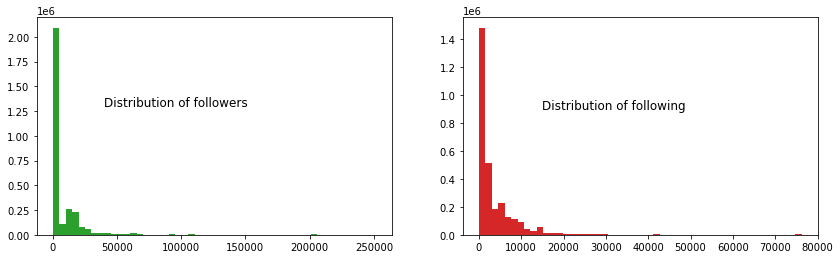

In [65]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1,2, figsize=(14, 4))
axs[0].hist(df.followers, bins=50, color="C2")
axs[0].text(40000, 1300000, 'Distribution of followers', fontsize='large')
axs[1].hist(df.following, bins=50, color="C3")
axs[1].text(15000, 900000, 'Distribution of following', fontsize='large')

In [69]:
print("TIMELINE " + str(df.publish_date.min()) + " TO " + str(df.publish_date.max()))

TIMELINE 1/1/2013 16:16 TO 9/9/2017 9:51


In [70]:
print('Number of unique Twitter accounts:')
print(df.author.nunique())

Number of unique Twitter accounts:
2843


In [71]:
print("Number of languages is:")
print(df.language.nunique())

Number of languages is:
56


In [73]:
print('Avg number of tweets per author: '+ \
      str(round(len(df)/df.author.nunique(), 1)))

Avg number of tweets per author: 1036.3


In [82]:
df.groupby('author')['content'].count().nlargest(10)

author
EXQUOTE            59174
SCREAMYMONKEY      44001
AMELIEBALDWIN      35261
WORLDNEWSPOLI      35155
TODAYPITTSBURGH    33602
SPECIALAFFAIR      32556
SEATTLE_POST       30793
FINDDIET           29038
KANSASDAILYNEWS    28806
ROOMOFRUMOR        28351
Name: content, dtype: int64

In [83]:
df.groupby('author')['content'].count().nsmallest(10)

author
459JISALGE         1
AAATEST1234        1
ABBASSHUKRI        1
ABU_UBAIDA2        1
ACTIVEMIKR         1
ALWAYSHUNGRYBAE    1
ANDREJFROLOV69     1
ARTEMBOGACHENKO    1
AU_NORTON          1
BLACKTIVISTDAVE    1
Name: content, dtype: int64